In [58]:
import pandas as pd
import numpy as np

In [59]:
data=pd.read_csv('/content/data.csv')

In [60]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [61]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()
data.fillna(data.mode(), inplace=True)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


Missing Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [62]:
from scipy.stats import zscore
numerical_data = data.select_dtypes(include=['float64', 'int64'])
z_scores = zscore(numerical_data)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
numerical_data = numerical_data[filtered_entries]
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.index.isin(numerical_data.index))]
data = data[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [64]:

data = data.drop_duplicates()

In [65]:
# prompt: data

# Assuming 'data' DataFrame is already defined and preprocessed as in the previous code.
# The following code will perform one-hot encoding on categorical columns.
# Please replace 'data' with the correct variable name if it differs in your context.

import pandas as pd

categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,False,False,False,False,False,False,False,False,False,False
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,False,False,False,False,False,False,False,False,False,False
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,False,False,False,False,False,False,False,False,False,False
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,False,False,False,False,True,False,False,False,False,False


In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
if data.shape[0] > 0:
    data[data.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
        data.select_dtypes(include=['float64', 'int64']))
else:
    print("DataFrame is empty. Skipping scaling.")

In [67]:
import pandas as pd
import numpy as np
if 'date' in data.columns:
    data['year'] = pd.to_datetime(data['date']).dt.year
    data['month'] = pd.to_datetime(data['date']).dt.month
    data.drop(columns=['date'], inplace=True)
else:
    print("The 'date' column is not found in the DataFrame. Check your data loading and previous steps.")

The 'date' column is not found in the DataFrame. Check your data loading and previous steps.


In [68]:
data = data[(data['price'] > 0) & (data['sqft_living'] > 0)]

In [69]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
4,0.520702,0.929382,0.745764,0.113094,1.027197,-0.908496,0.0,0.0,0.835585,-0.750738,...,False,False,False,False,False,False,False,False,False,False
12,0.720418,-0.358307,-0.401818,0.712743,2.331512,-0.908496,0.0,0.0,-0.673123,0.524553,...,False,False,False,False,False,False,False,False,False,False
20,1.558187,-0.358307,-0.401818,0.574362,1.050361,0.926459,0.0,0.0,2.344293,-0.120775,...,False,False,False,False,False,False,False,False,False,False
23,0.844916,0.929382,0.745764,1.327767,1.550170,0.926459,0.0,0.0,-0.673123,1.692290,...,False,False,False,False,False,False,False,False,False,False
26,0.857884,-0.358307,-0.401818,0.758870,0.074203,-0.908496,0.0,0.0,0.835585,-0.412709,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,0.113489,0.929382,1.510818,0.774245,-1.000551,0.008982,0.0,0.0,2.344293,0.032874,...,False,False,False,False,False,False,False,False,False,False
4578,1.156161,0.929382,0.363236,0.374480,1.666585,0.926459,0.0,0.0,0.835585,0.739663,...,False,False,False,False,False,False,False,False,False,False
4579,0.026807,-1.645996,-0.401818,0.189972,-0.903143,-0.908496,0.0,0.0,2.344293,-0.827563,...,False,False,False,False,False,False,False,False,False,False
4584,0.191019,-0.358307,-0.401818,0.020841,0.888212,-0.908496,0.0,0.0,0.835585,0.386268,...,False,False,False,False,False,False,False,False,False,False


In [70]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=3510)

<ipython-input-76-1aad5e196ab5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_category'] = (data['price'] > median_price).astype(int)


              precision    recall  f1-score   support

           0       0.73      0.76      0.75       100
           1       0.74      0.71      0.72        96

    accuracy                           0.73       196
   macro avg       0.73      0.73      0.73       196
weighted avg       0.73      0.73      0.73       196



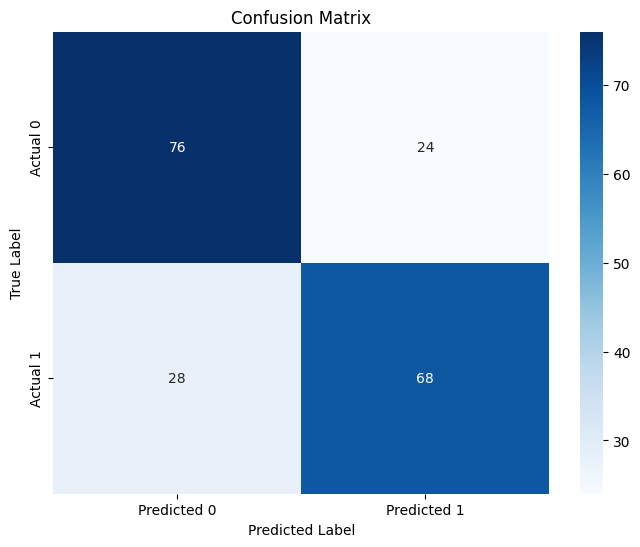

In [76]:
# prompt: create a logistic regression model and visualize it

import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'price' is the target variable and needs to be converted to a binary classification problem.
# For example, let's classify prices above the median as 1 and below as 0.
median_price = data['price'].median()
data['price_category'] = (data['price'] > median_price).astype(int)

# Define features (X) and target (y)
X = data.drop(['price', 'price_category'], axis=1)
y = data['price_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



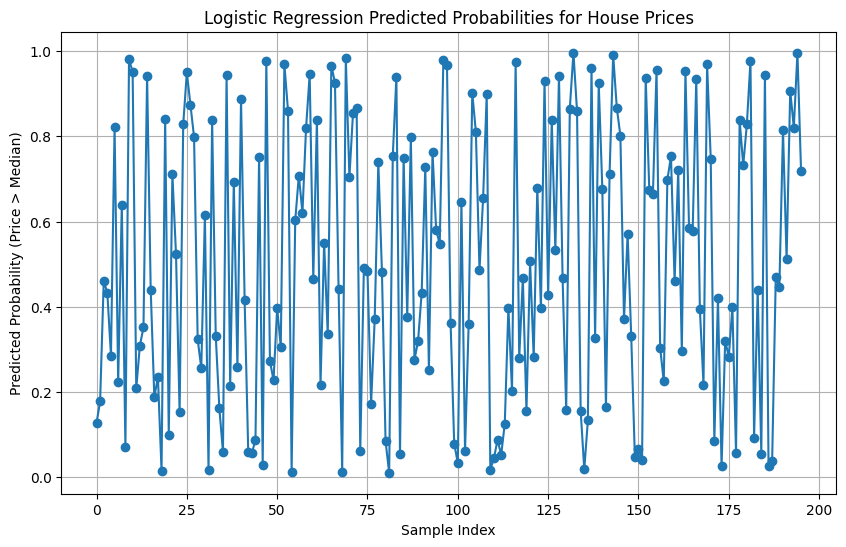

In [77]:
# prompt: create a logistic regression graph for the price of the house  a line graph for th e logistic regression model

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_test' and 'y_pred' are defined from the previous logistic regression code
# and you want to plot the predicted probabilities instead of just the predicted class labels.

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_pred_prob)), y_pred_prob, marker='o', linestyle='-')
plt.title('Logistic Regression Predicted Probabilities for House Prices')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability (Price > Median)')
plt.grid(True)
plt.show()